# Post-Covid Global Layoff Trends: Insights & Analysis

### This project dives into Global Layoff Trends Post-Covid, analysing how industries, company stages, funding, and locations influenced workforce reductions. By transforming raw data into interactive visualizations, it uncovers hidden patterns, highlights the most affected sectors and regions, and tells a compelling story of how the job market evolved. 

### The goal is to provide actionable, data-driven insights that are easy to explore and understand, making complex workforce shifts immediately clear to anyone reviewing the analysis.

In [1]:
# Dateset Link: https://www.kaggle.com/datasets/swaptr/layoffs-2022

In [2]:
# For Data handling
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# For SQL queries
import sqlite3

In [3]:
# Loading CSV into python
df = pd.read_csv('layoffs.csv')

## Data Information

In [4]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,9/1/2025,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,$75,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,9/1/2025,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,$375,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,9/1/2025,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,$304,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,8/31/2025,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,$65,United States,9/2/2025
4,Flip,SF Bay Area,NaN,8/29/2025,100%,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,$294,United States,8/30/2025


In [5]:
df.shape

(4149, 11)

In [6]:
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'funds_raised', 'country', 'date_added'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [8]:
df.describe()

,total_laid_off
count,2703.000000
mean,283.490566
std,976.103479
min,3.000000
25%,40.000000
50%,87.000000
75%,200.000000
max,22000.000000


In [9]:
df.describe(include = 'all')

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
count,4149,4148,2703.000000,4149,2633,4147,4146,4144,3688,4147,4149
unique,2820,265,NaN,1094,73,30,3898,16,718,66,955
top,Microsoft,SF Bay Area,NaN,4/2/2020,100%,Finance,Internal memo,Post-IPO,$1,United States,11/17/2022
freq,15,1034,NaN,27,329,494,101,943,45,2639,45
mean,NaN,NaN,283.490566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,976.103479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking missing values

In [10]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

<Axes: >

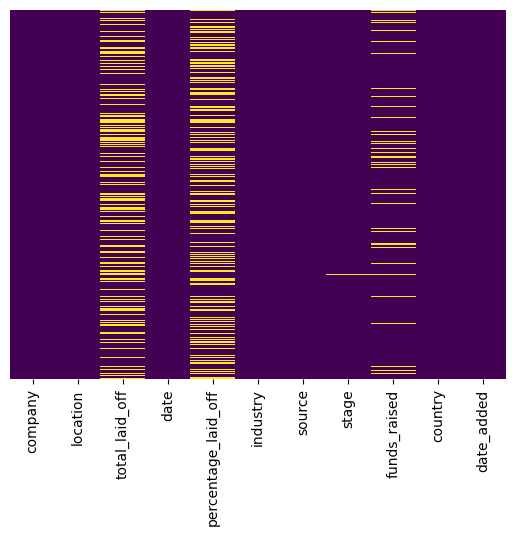

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Data Cleaning

In [12]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

## Data Standardization

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [14]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [15]:
df['date'] = df['date'].astype('datetime64[ns]')

In [16]:
df['date'].dtype

dtype('<M8[ns]')

In [17]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

In [18]:
df['percentage_laid_off'].unique()[:20]

array([nan, '100%', '9%', '2%', '23%', '10%', '12%', '6%', '34%', '16%',
       '40%', '7%', '14%', '3%', '25%', '4%', '1%', '30%', '17%', '20%'],
      dtype=object)

In [19]:
df['percentage_laid_off'] = df['percentage_laid_off'].astype(str).str.replace('%', '', regex = True)

In [20]:
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0).astype('float')

In [21]:
df['percentage_laid_off'].dtype

dtype('float64')

In [22]:
df['funds_raised'].unique()[:30]

array(['$75', '$375', '$304', '$65', '$294', '$3500', '$778', '$19', nan,
       '$2', '$548', '$127', '$164', '$26', '$166', '$736', '$1900',
       '$436', '$243', '$15', '$140', '$210', '$565', '$3000', '$726',
       '$9', '$5200', '$8100', '$5', '$602'], dtype=object)

In [23]:
df['funds_raised'] = df['funds_raised'].astype(str).str.replace('$','')

In [24]:
df['funds_raised'].unique()[:30]

array(['75', '375', '304', '65', '294', '3500', '778', '19', 'nan', '2',
       '548', '127', '164', '26', '166', '736', '1900', '436', '243',
       '15', '140', '210', '565', '3000', '726', '9', '5200', '8100', '5',
       '602'], dtype=object)

In [25]:
df['funds_raised'] = df['funds_raised'].fillna(0).astype('float')

In [26]:
df['funds_raised'].dtype

dtype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4149 non-null   object        
 1   location             4148 non-null   object        
 2   total_laid_off       2703 non-null   float64       
 3   date                 4149 non-null   datetime64[ns]
 4   percentage_laid_off  2633 non-null   float64       
 5   industry             4147 non-null   object        
 6   source               4146 non-null   object        
 7   stage                4144 non-null   object        
 8   funds_raised         3688 non-null   float64       
 9   country              4147 non-null   object        
 10  date_added           4149 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 356.7+ KB


In [28]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,375.0,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,2025-09-01,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,304.0,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,2025-08-31,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,65.0,United States,9/2/2025
4,Flip,SF Bay Area,NaN,2025-08-29,100.0,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,294.0,United States,8/30/2025


In [29]:
categorical_cols = ['company','industry','location','stage','source','country']

In [30]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [31]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.title() if isinstance(x, str) else x)

In [32]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [33]:
df['location'].unique()[:20]

array(['Mumbai,Non-U.S.', 'Bengaluru,Non-U.S.', 'Sf Bay Area', 'Seattle',
       'Boston', 'London,Non-U.S.', 'Los Angeles', 'Toronto,Non-U.S.',
       'St. Louis', 'Tokyo,Non-U.S.', 'New York City', 'Sydney,Non-U.S.',
       'Cologne,Non-U.S.', 'Bengaluru', 'Detroit', 'Raleigh',
       'Minneapolis', 'Stockholm,Non-U.S.', 'Sacramento', 'Austin'],
      dtype=object)

In [34]:
df['location'] = df['location'].str.split(',', n = 1, expand = True)[0].str.strip()

In [35]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025


In [36]:
df.rename(columns =  {'funds_raised': 'funds_raised_millions'}, inplace = True)

In [37]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [38]:
df['year'] = df['date'].dt.year

In [39]:
df['month_name'] = df['date'].dt.month_name()

In [40]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


# Handling Missing Values

In [41]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      3
stage                       5
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

<Axes: >

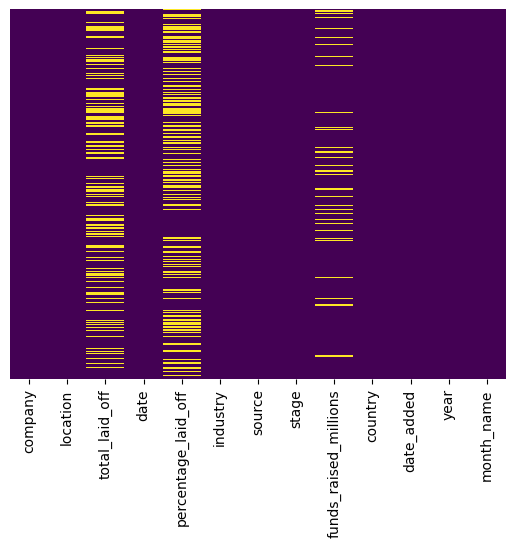

In [42]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [43]:
df['source'] = df['source'].fillna('unknown')

In [44]:
df['stage'] = df['stage'].fillna('unknown')

In [45]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      0
stage                       0
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [46]:
df['funds_raised_millions'] = df['funds_raised_millions'].fillna(0)

In [47]:
df['funds_raised_millions'].isnull().sum()

np.int64(0)

In [48]:
df[df['industry'].isnull()][['company','industry']]

,company,industry
30,Eyeo,NaN
1081,Appsmith,NaN


In [49]:
df[df['company'] == 'Eyeo'][['company','industry']].head()

,company,industry
30,Eyeo,NaN


In [50]:
df[df['company'] == 'Appsmith'][['company','industry']].head()

,company,industry
1081,Appsmith,NaN


In [51]:
df.loc[df['company'] == 'Eyeo', 'industry'] = 'Software'

In [52]:
df.loc[df['company'] == 'Appsmith', 'industry'] = 'Software'

In [53]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [54]:
df[df['country'].isnull()][['company','location','country']]

,company,location,country
1073,Fit Analytics,Berlin,NaN
1358,Ludia,Montreal,NaN


In [55]:
df.loc[df['location'] == 'Berlin', 'country'] = 'Germany'

In [56]:
df.loc[df['location'] == 'Montreal', 'country'] = 'Canada'

In [57]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [58]:
df[df['location'].isna()][['location','country']]

,location,country
1039,NaN,United States


In [59]:
df['location'] = df['location'].fillna('Unknown')

In [60]:
df.isnull().sum()

company                     0
location                    0
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [61]:
# total_laid_off And percentage_laid_off

missing_both = df[df['total_laid_off'].isnull() & df['percentage_laid_off'].isnull()]
missing_both

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
6,Verily,Sf Bay Area,NaN,2025-08-26,NaN,Healthcare,Https://Www.Businessinsider.Com/Alphabets-Veri...,Subsidiary,3500.0,United States,8/30/2025,2025,August
7,Klaviyo,Boston,NaN,2025-08-25,NaN,Marketing,Https://Www.Theinformation.Com/Briefings/Klavi...,Unknown,778.0,United States,8/25/2025,2025,August
9,Tiktok,London,NaN,2025-08-22,NaN,Consumer,Https://Www.Wsj.Com/Tech/Tiktok-To-Lay-Off-Hun...,Acquired,0.0,United Kingdom,8/23/2025,2025,August
18,Amdocs,St. Louis,NaN,2025-08-12,NaN,Support,Https://Www.Calcalistech.Com/Ctechnews/Article...,Post-Ipo,0.0,United States,8/18/2025,2025,August
19,Crunchyroll,Tokyo,NaN,2025-08-12,NaN,Media,Https://Www.Thewrap.Com/Crunchyroll-Restructur...,Acquired,26.0,Japan,8/18/2025,2025,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,Spothero,Chicago,NaN,2020-03-24,NaN,Transportation,Https://Americaninno.Com/Chicago/Inno-News-Chi...,Series D,117.0,United States,3/28/2020,2020,March
4127,Zwift,Los Angeles,NaN,2020-03-23,NaN,Fitness,Https://Www.Dcrainmaker.Com/2020/03/Zwift-Lays...,Series B,164.0,United States,4/2/2020,2020,March
4133,Vacasa,Portland,NaN,2020-03-20,NaN,Travel,Https://Www.Bizjournals.Com/Portland/News/2020...,Series C,526.0,United States,3/28/2020,2020,March
4138,Anyvision,Tel Aviv,NaN,2020-03-19,NaN,Security,Https://Ipvm.Com/Reports/Anyvision-20-Layoffs,Series A,74.0,Israel,3/30/2020,2020,March


In [62]:
df['industry'].unique()

array(['Consumer', 'Ai', 'Sales', 'Healthcare', 'Marketing', 'Retail',
       'Infrastructure', 'Other', 'Transportation', 'Food', 'Security',
       'Support', 'Media', 'Fitness', 'Finance', 'Software', 'Logistics',
       'Crypto', 'Real Estate', 'Product', 'Data', 'Hardware', 'Hr',
       'Education', 'Energy', 'Manufacturing', 'Travel', 'Aerospace',
       'Recruiting', 'Construction', 'Legal'], dtype=object)

In [63]:
# grouping the data by industry

industry_groups = df.groupby('industry')

In [64]:
# calculating median of total_laid_off for each industry

industry_median = industry_groups['total_laid_off'].median()

In [65]:
industry_median

industry
Aerospace         100.0
Ai                 21.0
Construction      127.0
Consumer          100.0
Crypto             69.0
Data               80.0
Education          95.0
Energy            154.0
Finance            71.0
Fitness           135.0
Food              124.0
Hardware          305.5
Healthcare         82.5
Hr                 59.0
Infrastructure     67.5
Legal              75.0
Logistics          64.0
Manufacturing     108.0
Marketing          52.0
Media              50.0
Other             110.0
Product            35.5
Real Estate       100.0
Recruiting         58.0
Retail            100.0
Sales              70.0
Security           70.0
Software           35.0
Support            95.0
Transportation    129.0
Travel            137.0
Name: total_laid_off, dtype: float64

In [66]:
# Filling Nan in total_laid_off using industry median

df['total_laid_off'] = df['total_laid_off'].fillna(df['industry'].map(industry_median))

In [67]:
df.isnull().sum()

company                     0
location                    0
total_laid_off              0
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [68]:
# Grouping industry wise median

industry_median_pct = df.groupby('industry')['percentage_laid_off'].median()

In [69]:
industry_median_pct

industry
Aerospace         25.0
Ai                20.0
Construction      16.0
Consumer          17.0
Crypto            20.0
Data              13.5
Education         20.0
Energy            25.0
Finance           20.0
Fitness           18.0
Food              20.0
Hardware           7.0
Healthcare        20.0
Hr                15.0
Infrastructure    13.0
Legal             10.0
Logistics         15.0
Manufacturing     15.0
Marketing         14.0
Media             15.0
Other             15.0
Product           16.0
Real Estate       22.0
Recruiting        17.5
Retail            18.0
Sales              9.5
Security          10.0
Software          32.5
Support           10.0
Transportation    17.0
Travel            22.0
Name: percentage_laid_off, dtype: float64

In [70]:
## Filling missing percentage_laid_off 

df['percentage_laid_off'] = df['percentage_laid_off'].fillna(df['industry'].map(industry_median_pct))

In [71]:
df['percentage_laid_off'].isnull().sum()

np.int64(0)

In [72]:
df.isnull().sum()

company                  0
location                 0
total_laid_off           0
date                     0
percentage_laid_off      0
industry                 0
source                   0
stage                    0
funds_raised_millions    0
country                  0
date_added               0
year                     0
month_name               0
dtype: int64

In [73]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


In [74]:
df = df.drop(columns = ['date_added','source'])

In [75]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Series C,294.0,United States,2025,August


# Database

In [76]:
# Creating a connection to a new SQLite database

conn = sqlite3.connect('layoffs.db')

In [77]:
c = conn.cursor()

In [78]:
# loading clean dataframe into sqlite

df.to_sql('layoffs',conn, if_exists = 'replace', index = False)

4149

In [79]:
# Verifying table creation

pd.read_sql_query('SELECT * FROM layoffs LIMIT 5;', conn)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01 00:00:00,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01 00:00:00,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01 00:00:00,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31 00:00:00,9.5,Sales,Post-Ipo,65.0,United States,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29 00:00:00,100.0,Consumer,Series C,294.0,United States,2025,August


In [80]:
# Checking total number of rows

pd.read_sql_query('SELECT COUNT(*) AS total_rows FROM layoffs;', conn)

,total_rows
0,4149


In [81]:
# Checking distinct industries

pd.read_sql_query('SELECT DISTINCT industry FROM layoffs;', conn)

,industry
0,Consumer
1,Ai
2,Sales
3,Healthcare
4,Marketing
5,Retail
6,Infrastructure
7,Other
8,Transportation
9,Food


In [82]:
# Checking Distinct countries

pd.read_sql_query('SELECT DISTINCT country FROM layoffs;', conn)

,country
0,India
1,United States
2,United Kingdom
3,Canada
4,Japan
...,...
61,Turkey
62,Russia
63,Bulgaria
64,South Africa


In [83]:
## Total layoffs per industry

industry_layoffs_query = '''
SELECT industry,
SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY industry
ORDER BY total_laid_off DESC;
'''

In [84]:
industry_layoffs = pd.read_sql_query(industry_layoffs_query, conn)

In [85]:
industry_layoffs

,industry,total_laid_off
0,Hardware,93554.5
1,Other,92777.0
2,Consumer,86656.0
3,Retail,84921.0
4,Transportation,74773.0
5,Finance,64175.0
6,Food,60348.0
7,Healthcare,48544.0
8,Travel,27891.0
9,Real Estate,26946.0


In [86]:
## Average percentage laid off per industry

industry_avg_pct_query = '''
SELECT industry, AVG(percentage_laid_off) AS avg_percentage
FROM layoffs
GROUP BY industry
ORDER BY avg_percentage DESC;
'''

In [87]:
industry_pct = pd.read_sql_query(industry_avg_pct_query, conn)

In [88]:
industry_pct

,industry,avg_percentage
0,Aerospace,37.750000
1,Energy,32.956522
2,Software,32.500000
3,Food,32.380753
4,Ai,31.541667
5,Construction,30.000000
6,Healthcare,29.537267
7,Travel,29.019048
8,Real Estate,28.975309
9,Crypto,28.183007


In [89]:
## Top 10 companies by layoffs

companies_layoff_query = '''
SELECT company, total_laid_off
FROM layoffs
ORDER BY total_laid_off DESC
LIMIT 10;
'''

In [90]:
top_companies = pd.read_sql_query(companies_layoff_query, conn)

In [91]:
top_companies

,company,total_laid_off
0,Intel,22000.0
1,Intel,15000.0
2,Tesla,14000.0
3,Google,12000.0
4,Meta,11000.0
5,Meta,10000.0
6,Microsoft,10000.0
7,Amazon,10000.0
8,Microsoft,9000.0
9,Amazon,9000.0


In [92]:
## Company wise total layoffs

company_total_layoffs_query = '''
SELECT company,
       SUM(total_laid_off) AS total_layoffs
FROM layoffs
GROUP BY company
ORDER BY total_layoffs DESC;
'''

In [93]:
company_total_layoffs = pd.read_sql_query(company_total_layoffs_query, conn)

In [94]:
company_total_layoffs.head(10)

,company,total_layoffs
0,Intel,43726.0
1,Microsoft,30673.0
2,Amazon,28540.0
3,Meta,25000.0
4,Salesforce,16140.0
5,Tesla,14629.0
6,Cisco,14521.0
7,Google,14247.0
8,Dell,13261.0
9,Sap,11000.0


In [95]:
## Year wise trends of layoffs

yearly_layoff_query = '''
SELECT year, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY year
ORDER BY year;
'''

In [96]:
yearly_trend = pd.read_sql_query(yearly_layoff_query, conn)

In [97]:
yearly_trend

,year,total_laid_off
0,2020,95606.0
1,2021,16892.5
2,2022,202237.0
3,2023,313984.5
4,2024,176867.5
5,2025,94847.0


In [98]:
## Country wise total layoffs

country_layoffs_query = '''
SELECT country, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY country
ORDER BY total_laid_off DESC;
'''

In [99]:
country_layoffs = pd.read_sql_query(country_layoffs_query, conn)

In [100]:
country_layoffs

,country,total_laid_off
0,United States,616926.0
1,India,66945.0
2,Germany,34473.5
3,United Kingdom,27880.5
4,Netherlands,20251.0
...,...,...
61,Hungary,67.5
62,Thailand,55.0
63,Ukraine,50.0
64,Philippines,50.0


In [101]:
## Stage wise layoffs

stage_layoffs_query = '''
SELECT stage, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY stage
ORDER BY total_laid_off DESC;
'''

In [102]:
stage_layoffs = pd.read_sql_query(stage_layoffs_query, conn)

In [103]:
stage_layoffs

,stage,total_laid_off
0,Post-Ipo,478719.5
1,Unknown,101464.5
2,Acquired,79979.0
3,Series B,45275.5
4,Series C,40400.0
5,Series D,35381.0
6,Series E,28870.0
7,Series A,18637.0
8,Series F,16937.5
9,Private Equity,14151.5


In [104]:
## Analysing both months and year wise trend by grouping them

month_year_trend_query = '''
SELECT year, month_name, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY year, month_name
ORDER BY year, month_name;
'''

In [105]:
month_year_trend = pd.read_sql_query(month_year_trend_query, conn)

In [106]:
month_year_trend

,year,month_name,total_laid_off
0,2020,April,32490.0
1,2020,August,2755.0
2,2020,December,852.0
3,2020,July,7724.0
4,2020,June,8455.0
...,...,...,...
62,2025,July,17440.5
63,2025,June,2422.0
64,2025,March,9322.0
65,2025,May,11291.0


In [107]:
## Analysing both Industry and Country trends by grouping them

industry_country_query = '''
SELECT industry, country, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY industry, country
ORDER BY total_laid_off DESC;
'''

In [108]:
industry_country = pd.read_sql_query(industry_country_query, conn)

In [109]:
industry_country

,industry,country,total_laid_off
0,Hardware,United States,88550.5
1,Consumer,United States,70546.0
2,Other,United States,62397.0
3,Retail,United States,57134.0
4,Transportation,United States,51479.0
...,...,...,...
410,Real Estate,Israel,11.0
411,Logistics,Israel,10.0
412,Product,United Kingdom,10.0
413,Crypto,United Arab Emirates,9.0


In [110]:
# Funding wise layoff trend analysis

funding_layoffs_query = '''
SELECT stage, 
       AVG(funds_raised_millions) AS avg_funds_raised, 
       SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY stage
ORDER BY total_laid_off DESC;
'''

In [111]:
funding_layoffs = pd.read_sql_query(funding_layoffs_query, conn)

In [112]:
funding_layoffs

,stage,avg_funds_raised,total_laid_off
0,Post-Ipo,1920.109226,478719.5
1,Unknown,429.046875,101464.5
2,Acquired,325.165775,79979.0
3,Series B,104.391398,45275.5
4,Series C,199.311628,40400.0
5,Series D,369.697674,35381.0
6,Series E,616.063158,28870.0
7,Series A,42.324528,18637.0
8,Series F,706.526786,16937.5
9,Private Equity,779.402778,14151.5


In [113]:
## Ranking top company per country

ranking_query = '''
SELECT country,
       company,
       total_laid_off,
       RANK() OVER (PARTITION BY country
       ORDER BY total_laid_off DESC) AS rank_in_country
FROM layoffs
WHERE total_laid_off IS NOT NULL
ORDER BY country, rank_in_country;
'''

In [114]:
top_companies_country = pd.read_sql_query(ranking_query, conn)

In [115]:
top_companies_country

,country,company,total_laid_off,rank_in_country
0,Argentina,Rappi,124.0,1
1,Argentina,Lemon,100.0,2
2,Argentina,Buenbit,80.0,3
3,Argentina,Ualá,53.0,4
4,Argentina,Tiendanube,50.0,5
...,...,...,...,...
4144,Uruguay,Satellogic,70.0,2
4145,Uruguay,Satellogic,34.0,3
4146,Vietnam,Wefit,135.0,1
4147,Vietnam,Propzy,100.0,2


In [116]:
top_companies_country[top_companies_country['rank_in_country'] <= 3]

,country,company,total_laid_off,rank_in_country
0,Argentina,Rappi,124.0,1
1,Argentina,Lemon,100.0,2
2,Argentina,Buenbit,80.0,3
6,Australia,Atlassian,500.0,1
7,Australia,Milkrun,400.0,2
...,...,...,...,...
4144,Uruguay,Satellogic,70.0,2
4145,Uruguay,Satellogic,34.0,3
4146,Vietnam,Wefit,135.0,1
4147,Vietnam,Propzy,100.0,2


In [117]:
# Top industries per year 

top_industries_year_query = '''
SELECT year,
       industry,
       SUM(total_laid_off) AS total_laid_off,
       RANK() OVER (PARTITION BY year ORDER BY SUM(total_laid_off) DESC) AS rank_in_year
FROM layoffs
GROUP BY year, industry
ORDER BY year, rank_in_year;
'''

In [118]:
top_industries_year = pd.read_sql_query(top_industries_year_query, conn)

In [119]:
top_industries_year[top_industries_year['rank_in_year'] <= 5]

,year,industry,total_laid_off,rank_in_year
0,2020,Travel,16586.0,1
1,2020,Transportation,15946.0,2
2,2020,Retail,10002.0,3
3,2020,Finance,9902.0,4
4,2020,Food,6838.0,5
27,2021,Consumer,3800.0,1
28,2021,Real Estate,2900.0,2
29,2021,Food,2768.0,3
30,2021,Construction,2434.0,4
31,2021,Education,1943.0,5


In [120]:
##  Layoffs larger than 100

large_layoffs_query = '''
SELECT company,
       country,
       industry,
       total_laid_off,
       date
FROM layoffs
WHERE total_laid_off > 100
ORDER BY total_laid_off DESC;
'''

In [121]:
large_layoffs = pd.read_sql_query(large_layoffs_query, conn)

In [122]:
## Top 10 layoffs

large_layoffs.head(10)

,company,country,industry,total_laid_off,date
0,Intel,United States,Hardware,22000.0,2025-04-23 00:00:00
1,Intel,United States,Hardware,15000.0,2024-08-01 00:00:00
2,Tesla,United States,Transportation,14000.0,2024-04-15 00:00:00
3,Google,United States,Consumer,12000.0,2023-01-20 00:00:00
4,Meta,United States,Consumer,11000.0,2022-11-09 00:00:00
5,Meta,United States,Consumer,10000.0,2023-03-14 00:00:00
6,Microsoft,United States,Other,10000.0,2023-01-18 00:00:00
7,Amazon,United States,Retail,10000.0,2022-11-16 00:00:00
8,Microsoft,United States,Other,9000.0,2025-07-02 00:00:00
9,Amazon,United States,Retail,9000.0,2023-03-20 00:00:00


# Explolatory Data Analysis

In [123]:
df.to_csv('layoffs_cleaned.csv', index = False)

In [124]:
df.shape

(4149, 11)

In [125]:
# Sum of total_laid_off per industry

industry_layoffs = df.groupby('industry', as_index=False)['total_laid_off'].sum().sort_values('total_laid_off', ascending=False)

In [126]:
# Top 10 industries

industry_layoffs_top10 = industry_layoffs.head(10)

In [127]:
industry_layoffs_top10

,industry,total_laid_off
11,Hardware,93554.5
20,Other,92777.0
3,Consumer,86656.0
24,Retail,84921.0
29,Transportation,74773.0
8,Finance,64175.0
10,Food,60348.0
12,Healthcare,48544.0
30,Travel,27891.0
22,Real Estate,26946.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\1869946557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


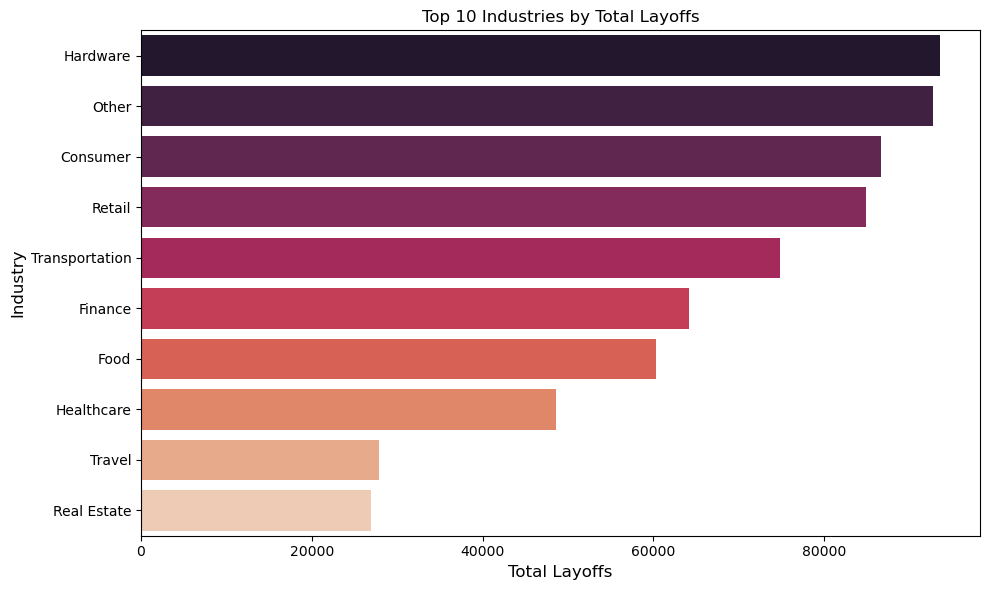

In [128]:
# Figure size and style

plt.figure(figsize=(10,6))
sns.barplot(
    y ='industry', 
    x ='total_laid_off', 
    data =industry_layoffs_top10, 
    palette ='rocket'
)
plt.title("Top 10 Industries by Total Layoffs")
plt.xlabel('Total Layoffs', fontsize = 12)
plt.ylabel("Industry", fontsize = 12)
plt.tight_layout()
plt.savefig('Top 10 Industries by Total Layoffs')

In [129]:
# Year-wise sum of total layoffs

yearly_layoffs = df.groupby('year', as_index=False)['total_laid_off'].sum()

In [130]:
yearly_layoffs

,year,total_laid_off
0,2020,95606.0
1,2021,16892.5
2,2022,202237.0
3,2023,313984.5
4,2024,176867.5
5,2025,94847.0


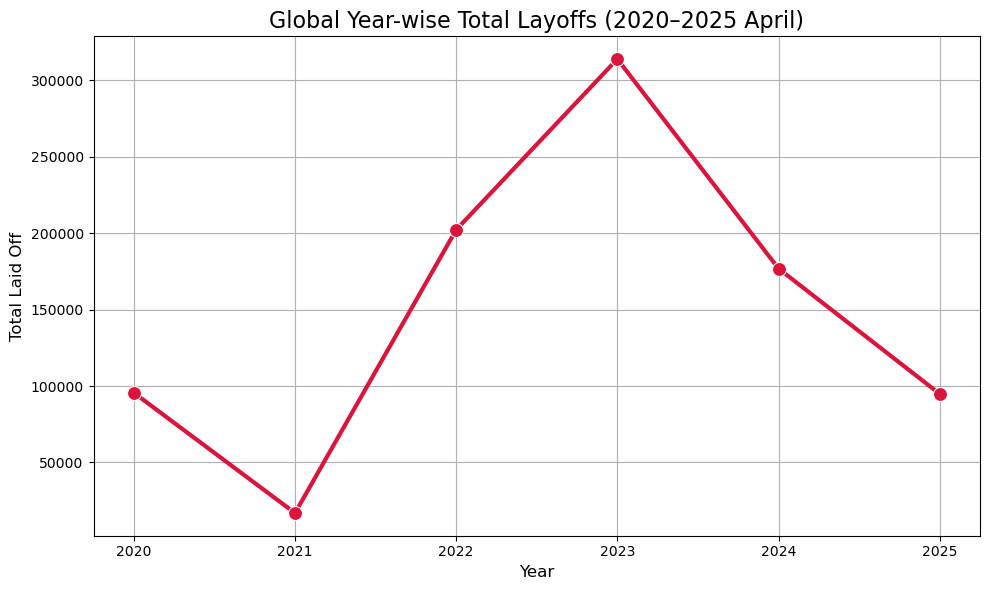

In [131]:
plt.figure(figsize=(10,6))
sns.lineplot(
    x='year', 
    y='total_laid_off', 
    data=yearly_layoffs, 
    marker='o',
    markersize = 10,
    linewidth = 3,
    color='crimson'
)
plt.title("Global Year-wise Total Layoffs (2020–2025 April)",fontsize = 16)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Laid Off", fontsize = 12)
plt.xticks(yearly_layoffs['year'])  # ensure only available years on x-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('Year-wise Total Layoffs')

In [132]:
# Month-wise total layoffs (ignoring year)
monthly_layoffs = df.groupby('month_name')['total_laid_off'].sum()
monthly_layoffs = monthly_layoffs.sort_values(ascending = False)

In [133]:
monthly_layoffs

month_name
January      148881.5
April        110779.5
February      86875.5
November      85029.5
May           83897.0
March         78270.5
August        72019.0
July          71697.5
June          63496.0
October       41807.0
December      32947.0
September     24734.5
Name: total_laid_off, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\3156998666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


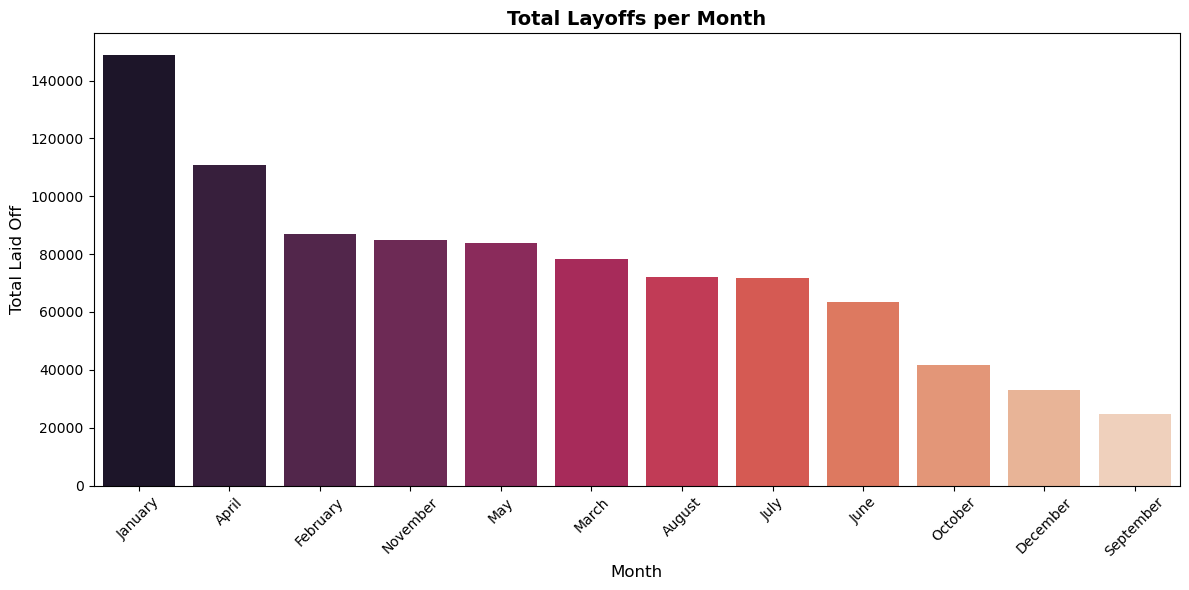

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=monthly_layoffs.index,        
    y=monthly_layoffs.values,       
    palette='rocket'              
)
plt.title("Total Layoffs per Month", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Laid Off", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total Layoffs per Month')

In [135]:
df.head(4)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August


In [136]:
# Creating Month-Year column

df['Month_Year'] = df['date'].dt.to_period('M') 

In [137]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name,Month_Year
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September,2025-09
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September,2025-09


In [138]:
# Sum of total layoffs per Month-Year

monthly_layoffs_timeline = df.groupby('Month_Year', as_index=False)['total_laid_off'].sum()

In [139]:
# Convert Month-Year to string for x-axis labels

monthly_layoffs_timeline['Month_Year_Str'] = monthly_layoffs_timeline['Month_Year'].astype(str)

In [140]:
monthly_layoffs_timeline.head()

,Month_Year,total_laid_off,Month_Year_Str
0,2020-03,12413.0,2020-03
1,2020-04,32490.0,2020-04
2,2020-05,27898.5,2020-05
3,2020-06,8455.0,2020-06
4,2020-07,7724.0,2020-07


In [141]:
top10_months = monthly_layoffs_timeline.nlargest(10, 'total_laid_off') 

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\2621138107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


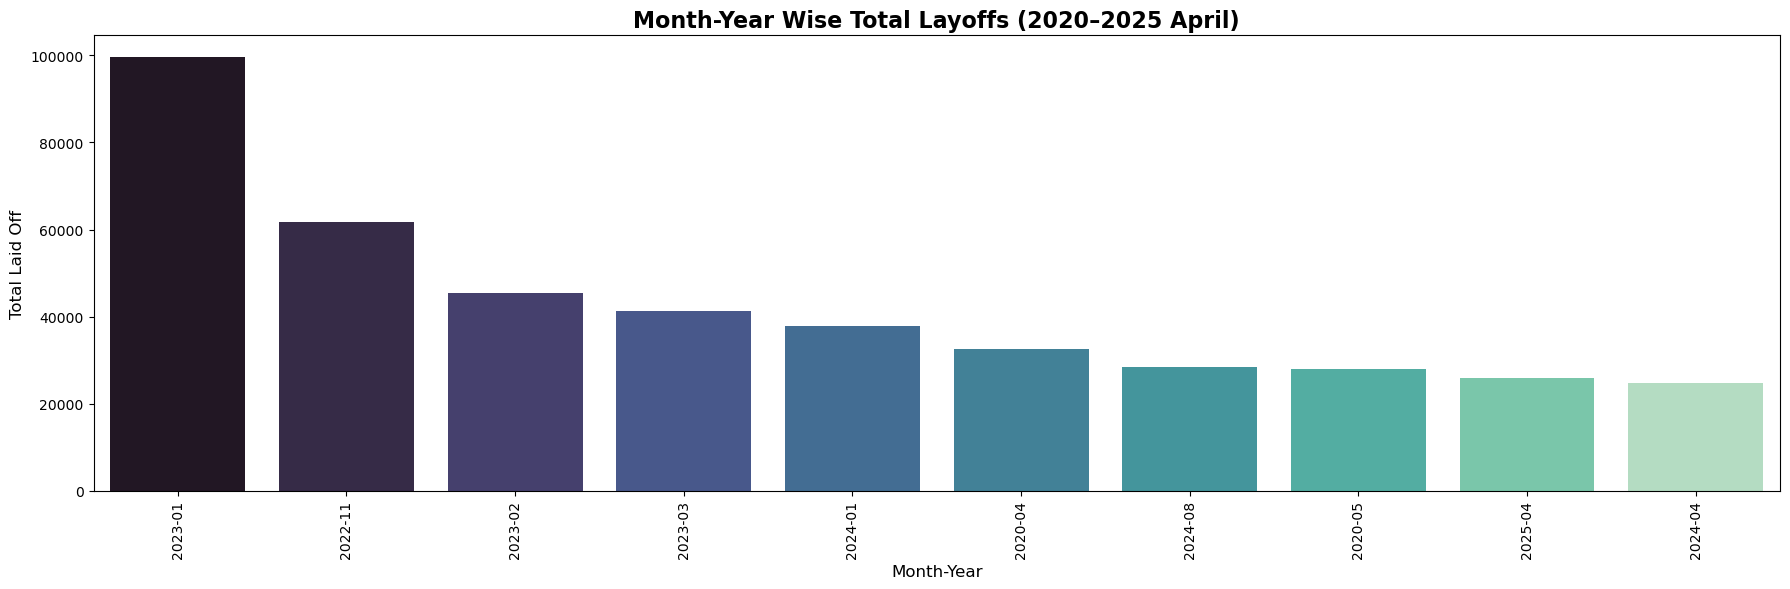

In [142]:
plt.figure(figsize=(18,6))
sns.barplot(
    x = 'Month_Year_Str',
    y = 'total_laid_off',
    data = top10_months,
    palette = 'mako'
)
plt.title("Month-Year Wise Total Layoffs (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Laid Off", fontsize=12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.savefig('Month-Year Wise Total Layoffs')

In [143]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name,Month_Year
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September,2025-09
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September,2025-09


In [144]:
# Sum of total layoffs per country

country_layoffs = df.groupby('country', as_index = False)['total_laid_off'].sum()

In [145]:
top10_countries = country_layoffs.nlargest(10, 'total_laid_off')
top10_countries

,country,total_laid_off
63,United States,616926.0
24,India,66945.0
19,Germany,34473.5
62,United Kingdom,27880.5
37,Netherlands,20251.0
55,Sweden,19556.0
7,Canada,18905.5
5,Brazil,12457.0
27,Israel,12242.5
10,China,10759.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\3803077666.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


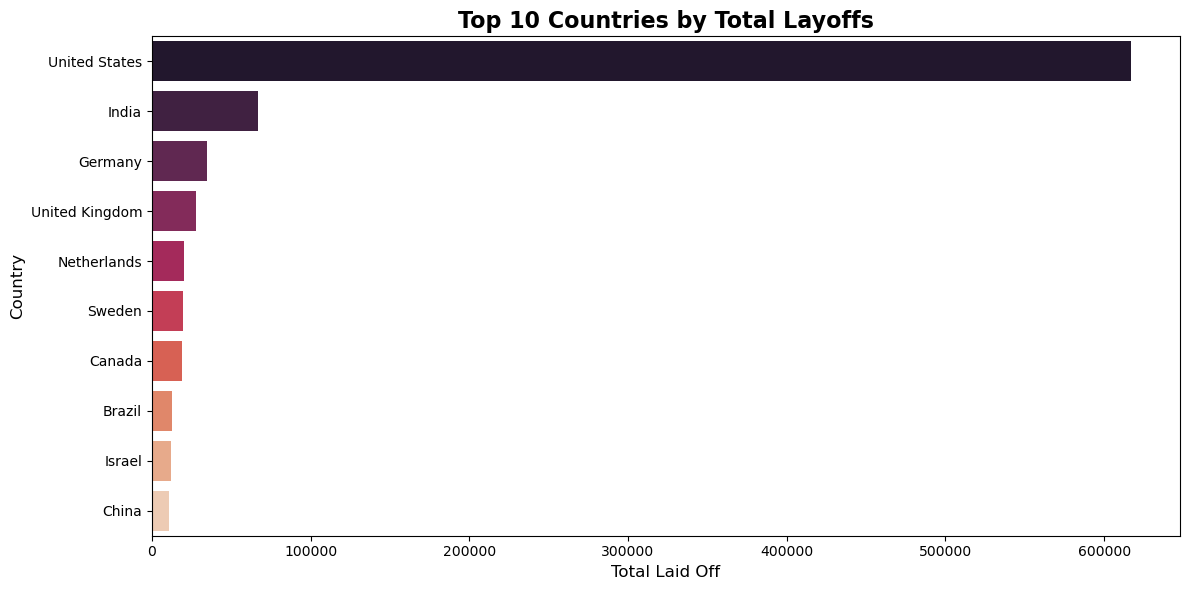

In [146]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    y='country',    
    x='total_laid_off',
    data=top10_countries,
    palette='rocket'
)

plt.title("Top 10 Countries by Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Total Laid Off", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.savefig('Top 10 Countries by Total Layoffs')

In [147]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name,Month_Year
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September,2025-09
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September,2025-09


In [148]:
df['Quarter_Year'] = df['date'].dt.to_period('Q')

In [149]:
quarterly_layoffs = df.groupby('Quarter_Year', as_index=False)['total_laid_off'].sum()

In [150]:
quarterly_layoffs.head()

,Quarter_Year,total_laid_off
0,2020Q1,12413.0
1,2020Q2,68843.5
2,2020Q3,11907.0
3,2020Q4,2442.5
4,2021Q1,8167.5


In [151]:
quarterly_layoffs['Quarter_Year_Str'] = quarterly_layoffs['Quarter_Year'].astype(str)

In [152]:
quarterly_layoffs.head()

,Quarter_Year,total_laid_off,Quarter_Year_Str
0,2020Q1,12413.0,2020Q1
1,2020Q2,68843.5,2020Q2
2,2020Q3,11907.0,2020Q3
3,2020Q4,2442.5,2020Q4
4,2021Q1,8167.5,2021Q1


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\562980184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


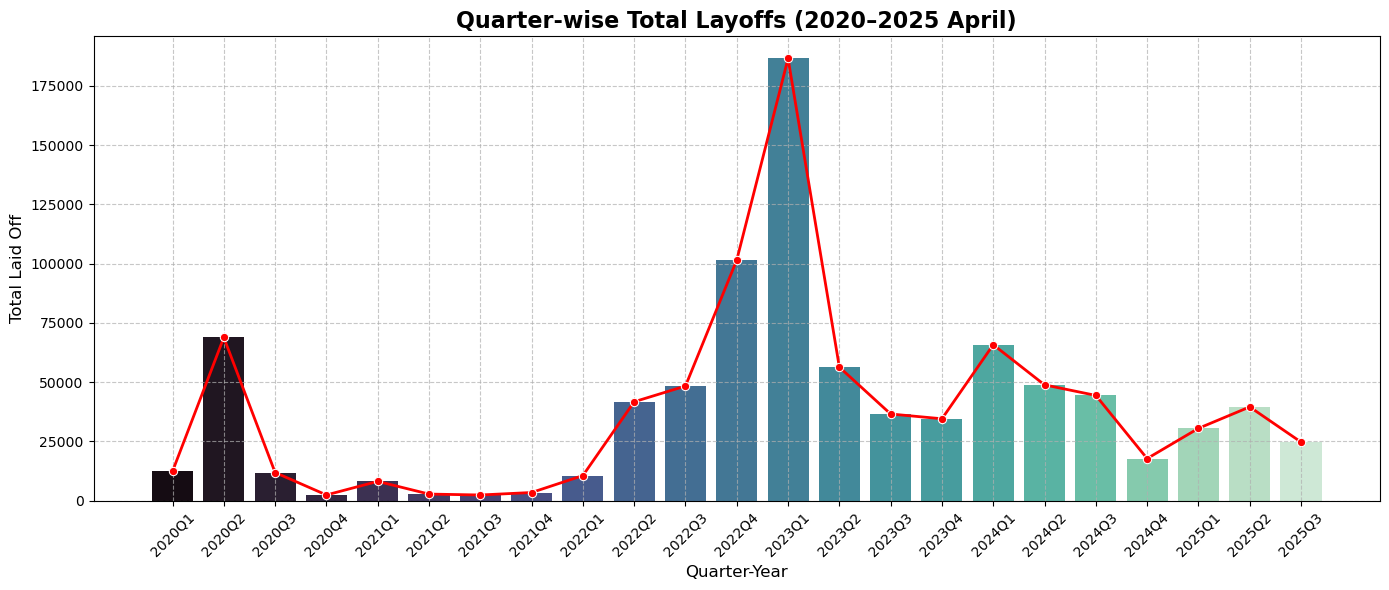

In [153]:
plt.figure(figsize=(14,6))

sns.barplot(
    x='Quarter_Year_Str',
    y='total_laid_off',
    data=quarterly_layoffs,
    palette='mako'
)

sns.lineplot(
    x='Quarter_Year_Str',
    y='total_laid_off',
    data=quarterly_layoffs,
    color='red',
    marker='o',
    linewidth=2
)

plt.title("Quarter-wise Total Layoffs (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Quarter-Year", fontsize=12)
plt.ylabel("Total Laid Off", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Quarter-wise Total Layoffs')

In [154]:
company_layoffs = df.groupby('company', as_index=False)['total_laid_off'].sum()

In [155]:
company_layoffs = company_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)

In [156]:
company_layoffs

,company,total_laid_off
1233,Intel,43726.0
1551,Microsoft,30673.0
95,Amazon,28540.0
1543,Meta,25000.0
2089,Salesforce,16140.0
2404,Tesla,14629.0
497,Cisco,14521.0
1031,Google,14247.0
690,Dell,13261.0
2104,Sap,11000.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\2718463998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


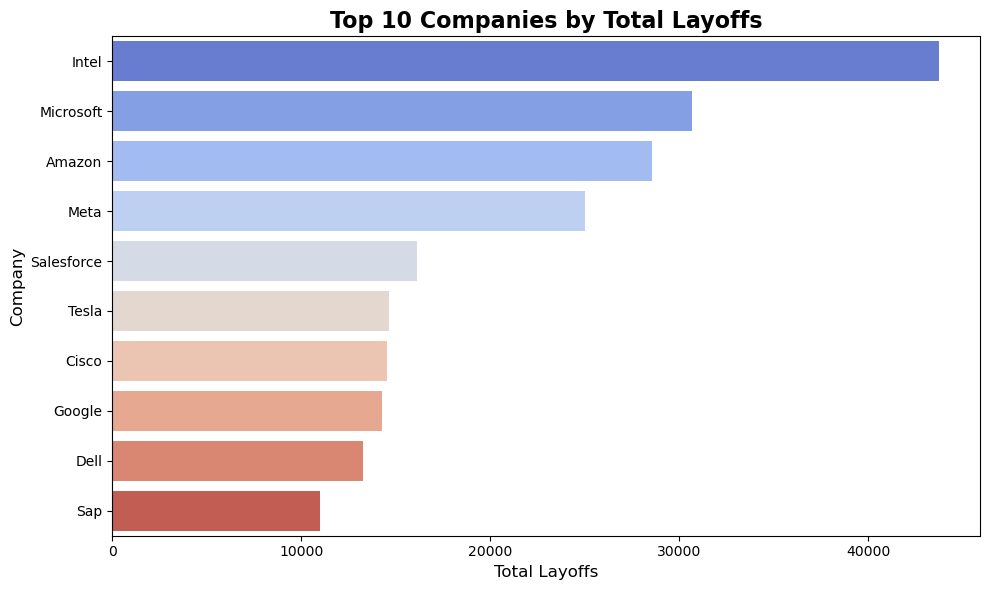

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='total_laid_off',
    y='company',
    data=company_layoffs,
    palette='coolwarm'
)
plt.title("Top 10 Companies by Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.tight_layout()
plt.savefig('Top 10 Companies by Total Layoffs')

In [158]:
# Group by industry and calculate mean of percentage laid off

industry_avg_pct = df.groupby('industry')['percentage_laid_off'].mean().reset_index()

In [159]:
# Sort in descending order
industry_avg_pct = industry_avg_pct.sort_values(by='percentage_laid_off', ascending=False)

industry_avg_pct.head()

,industry,percentage_laid_off
0,Aerospace,37.750000
7,Energy,32.956522
27,Software,32.500000
10,Food,32.380753
1,Ai,31.541667


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\319399668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


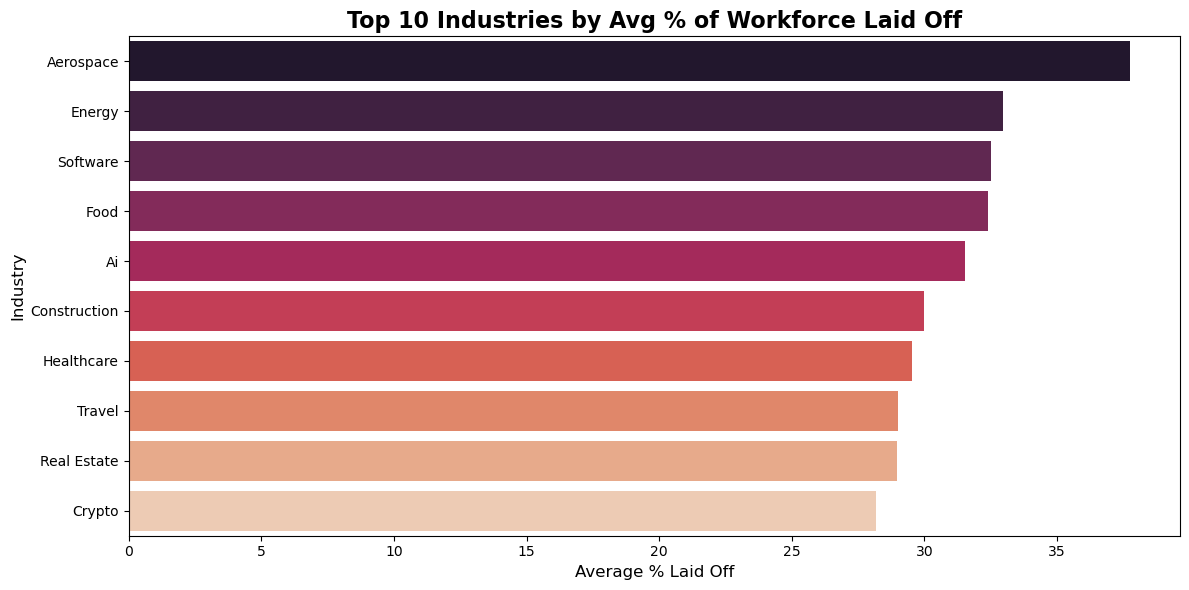

In [160]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=industry_avg_pct.head(10),  
    x='percentage_laid_off',
    y='industry',
    palette='rocket'
)

plt.title("Top 10 Industries by Avg % of Workforce Laid Off", fontsize=16, fontweight='bold')
plt.xlabel("Average % Laid Off", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.tight_layout()
plt.savefig('Top 10 Industries by Avg % Laid off')

In [161]:
# Group by company to get both total and avg % laid off
company_layoffs = df.groupby('company').agg({
    'total_laid_off': 'sum',
    'percentage_laid_off': 'mean'
}).reset_index()

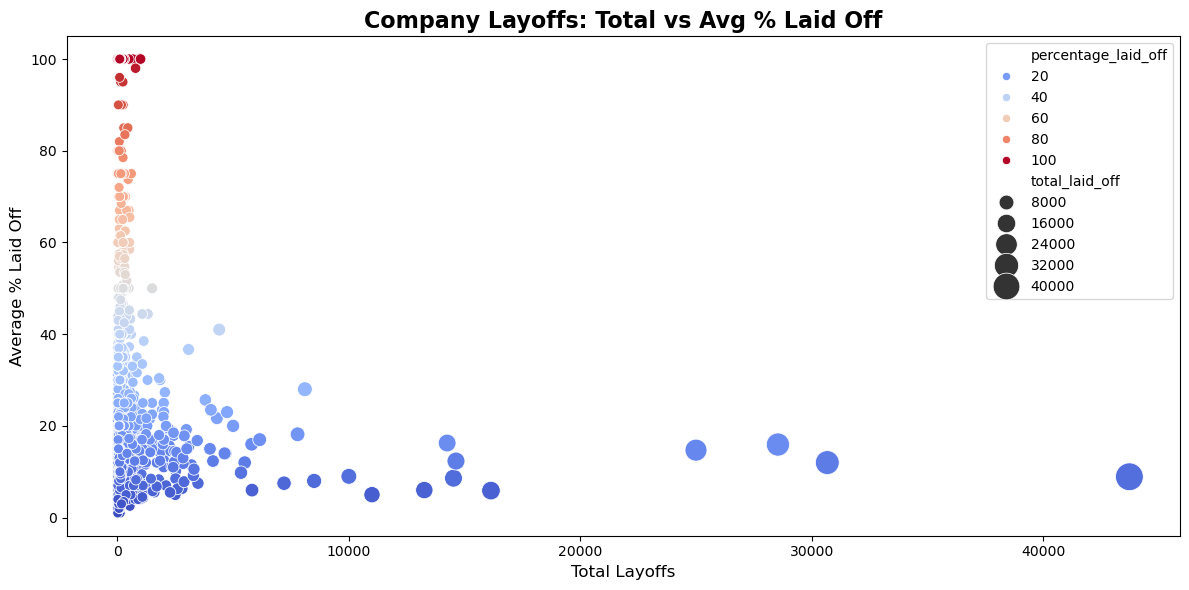

In [162]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=company_layoffs,
    x='total_laid_off',
    y='percentage_laid_off',
    hue='percentage_laid_off',
    size='total_laid_off',
    palette='coolwarm',
    sizes=(50, 400)
)

plt.title("Company Layoffs: Total vs Avg % Laid Off", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Average % Laid Off", fontsize=12)
plt.tight_layout()
plt.savefig('Total vs Avg % Laid off')

In [163]:
# Group by company to get total layoffs and total funding raised

funding_layoffs = df.groupby('company').agg({
    'total_laid_off': 'sum',
    'funds_raised_millions': 'sum'
}).reset_index()

In [164]:
# Remove companies with zero funding to avoid log(0) issues if needed
funding_layoffs = funding_layoffs[funding_layoffs['funds_raised_millions'] > 0]

funding_layoffs.head()

,company,total_laid_off,funds_raised_millions
0,#Paid,19.0,21.0
1,&Open,9.0,35.0
2,100 Thieves,112.0,240.0
3,10X Genomics,100.0,242.0
6,1Stdibs,70.0,253.0


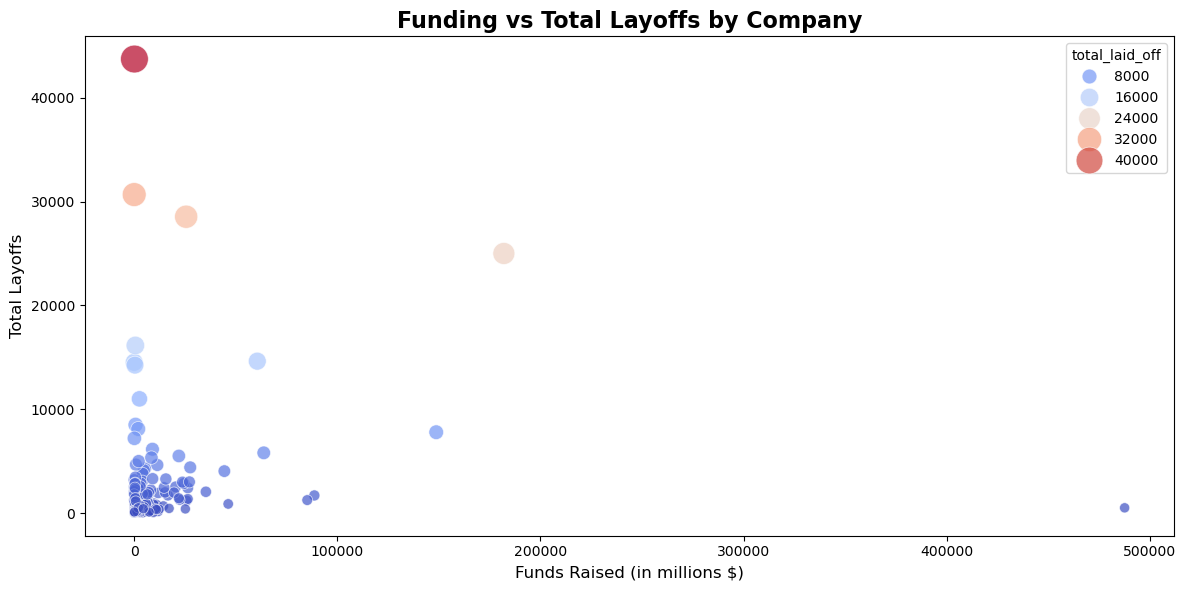

In [178]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=funding_layoffs,
    x='funds_raised_millions',
    y='total_laid_off',
    size='total_laid_off',
    hue='total_laid_off',
    palette='coolwarm',
    sizes = (50, 400),
    alpha = 0.7
)

plt.title("Funding vs Total Layoffs by Company", fontsize=16, fontweight='bold')
plt.xlabel("Funds Raised (in millions $)", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.tight_layout()
plt.show()

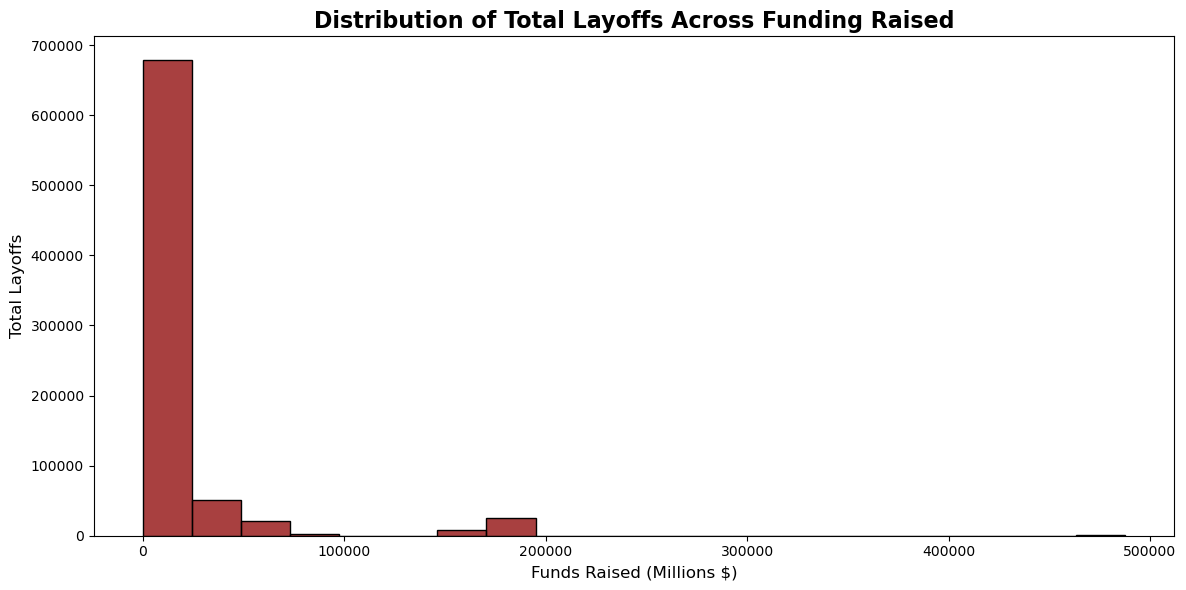

In [174]:
plt.figure(figsize=(12,6))
sns.histplot(
    data=funding_layoffs,
    x='funds_raised_millions',
    weights='total_laid_off',   # So bar height = total layoffs
    bins=20,
    color='darkred'
)

plt.title("Distribution of Total Layoffs Across Funding Raised", fontsize=16, fontweight='bold')
plt.xlabel("Funds Raised (Millions $)", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.tight_layout()
plt.show()

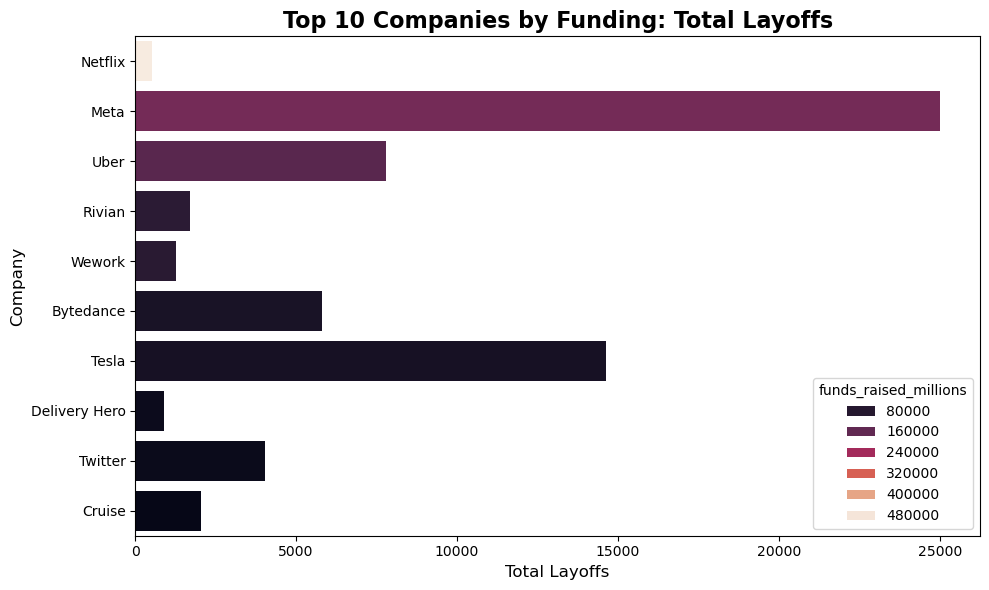

In [181]:
# Sort by funds raised and pick top 10
top10_companies = funding_layoffs.sort_values(by='funds_raised_millions', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_companies,
    x='total_laid_off',
    y='company',
    hue = 'funds_raised_millions',
    palette='rocket'
)

plt.title("Top 10 Companies by Funding: Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.tight_layout()
plt.show()

In [193]:
# Group by year and month_name
monthly_layoffs = df.groupby(['year', 'month_name'])['total_laid_off'].sum().reset_index()

# Optional: To keep months in calendar order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_layoffs['month_name'] = pd.Categorical(monthly_layoffs['month_name'], categories=months_order, ordered=True)
monthly_layoffs = monthly_layoffs.sort_values(['year','month_name'])
monthly_layoffs

,year,month_name,total_laid_off
5,2020,March,12413.0
0,2020,April,32490.0
6,2020,May,27898.5
4,2020,June,8455.0
3,2020,July,7724.0
...,...,...,...
65,2025,May,11291.0
63,2025,June,2422.0
62,2025,July,17440.5
59,2025,August,6556.5


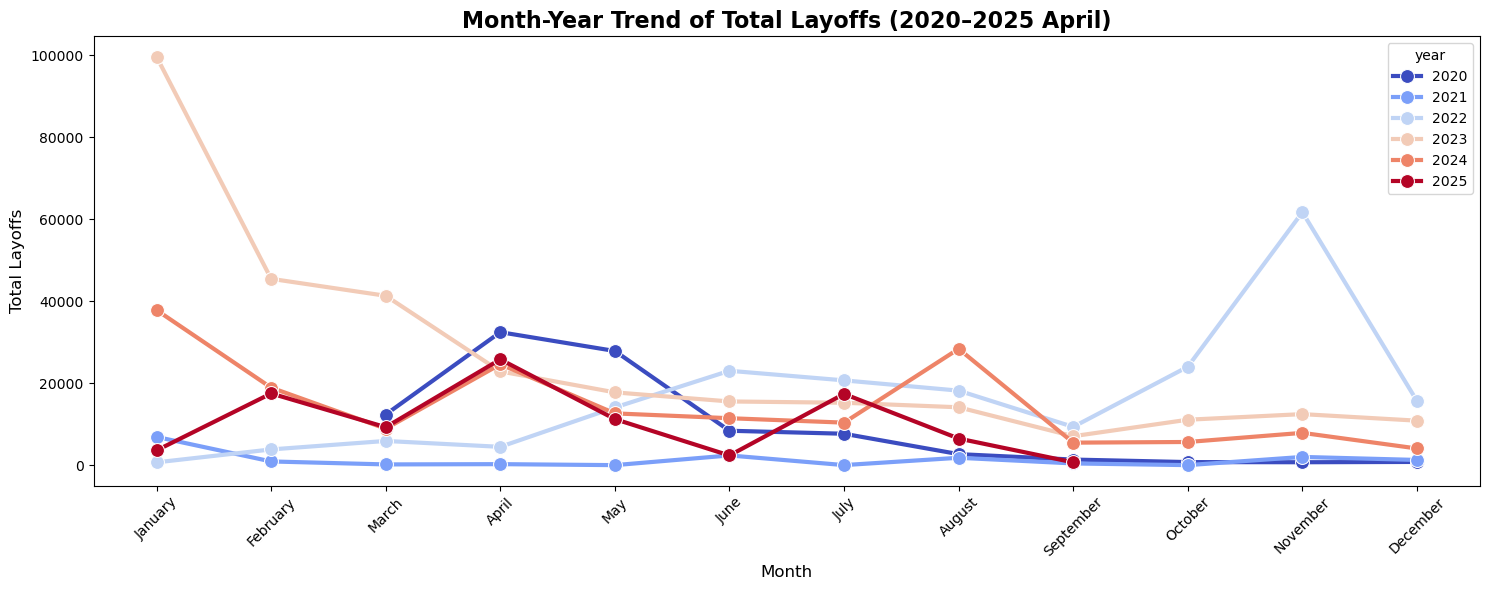

In [196]:
plt.figure(figsize=(15,6))
sns.lineplot(
    data=monthly_layoffs,
    x='month_name',
    y='total_laid_off',
    hue='year',
    marker='o',
    markersize = 10,
    linewidth = 3,
    palette='coolwarm'
)

plt.title("Month-Year Trend of Total Layoffs (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [197]:
# Pivot table: rows = year, columns = month, values = total layoffs
monthly_heatmap = df.pivot_table(
    index='year',
    columns='month_name',
    values='total_laid_off',
    aggfunc='sum'
)

# Reorder columns to calendar order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_heatmap = monthly_heatmap[months_order]

monthly_heatmap

month_name,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2020,NaN,NaN,12413.0,32490.0,27898.5,8455.0,7724.0,2755.0,1428.0,815.5,775.0,852.0
2021,6955.0,968.0,244.5,311.0,71.0,2434.0,80.0,1867.0,485.0,72.0,2070.0,1335.0
2022,749.0,3900.0,5967.5,4531.5,14136.0,23076.0,20736.5,18236.0,9396.0,24061.0,61734.0,15713.5
2023,99641.5,45497.0,41364.0,22925.0,17811.5,15597.5,15283.0,14176.0,7122.0,11143.5,12510.5,10913.0
2024,37874.5,18965.0,8959.5,24664.0,12689.0,11511.5,10433.5,28428.5,5553.5,5715.0,7940.0,4133.5
2025,3661.5,17545.5,9322.0,25858.0,11291.0,2422.0,17440.5,6556.5,750.0,NaN,NaN,NaN


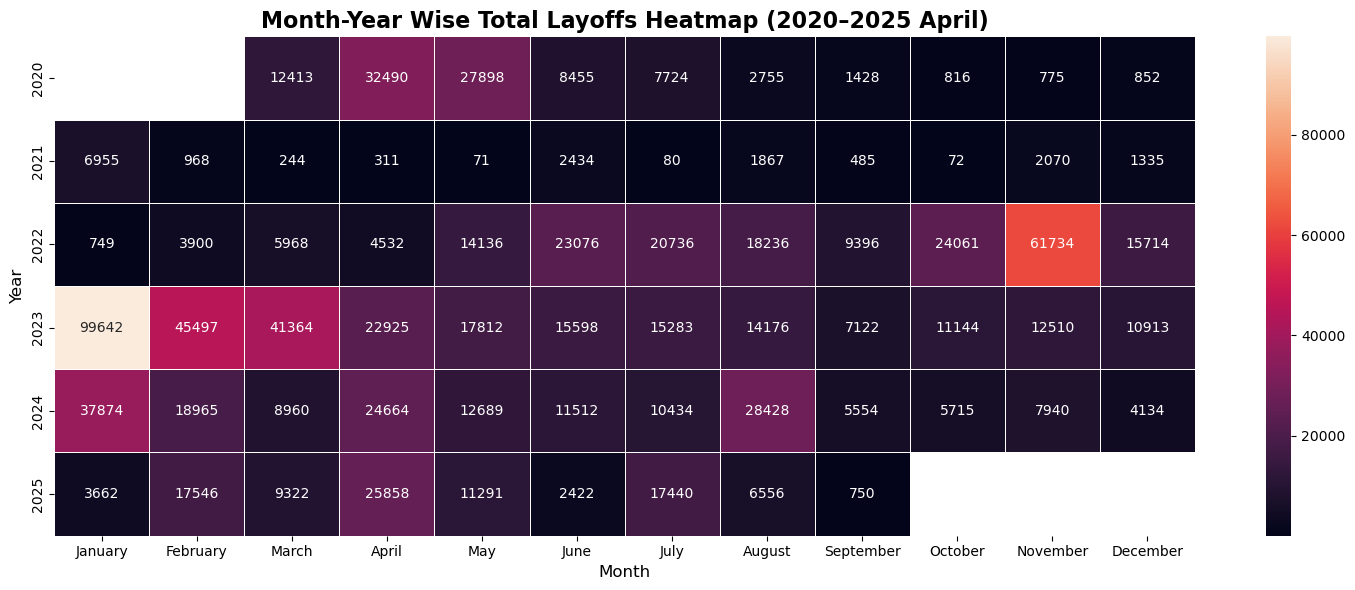

In [205]:
plt.figure(figsize=(15,6))
sns.heatmap(
    monthly_heatmap,
    annot=True,
    fmt=".0f",
    cmap='rocket',
    linewidths=0.5
)

plt.title("Month-Year Wise Total Layoffs Heatmap (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()

In [206]:
df[['industry','percentage_laid_off']].head()

,industry,percentage_laid_off
0,Consumer,17.0
1,Consumer,17.0
2,Ai,20.0
3,Sales,9.5
4,Consumer,100.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\2267148864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


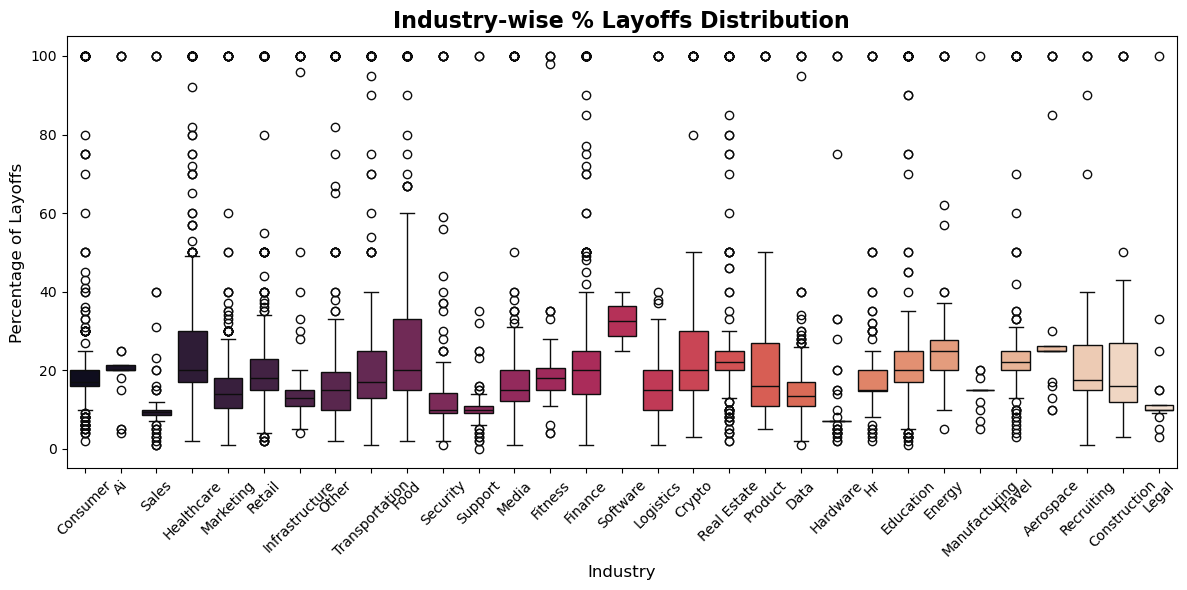

In [209]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='industry',
    y='percentage_laid_off',
    palette='rocket'
)

plt.title("Industry-wise % Layoffs Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Percentage of Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [210]:
# Group by stage and sum total layoffs
stage_total = df.groupby('stage')['total_laid_off'].sum().reset_index()

# Sort descending
stage_total = stage_total.sort_values(by='total_laid_off', ascending=False)
stage_total

,stage,total_laid_off
1,Post-Ipo,478719.5
15,Unknown,101464.5
0,Acquired,79979.0
5,Series B,45275.5
6,Series C,40400.0
7,Series D,35381.0
8,Series E,28870.0
4,Series A,18637.0
9,Series F,16937.5
2,Private Equity,14151.5


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\4001235245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


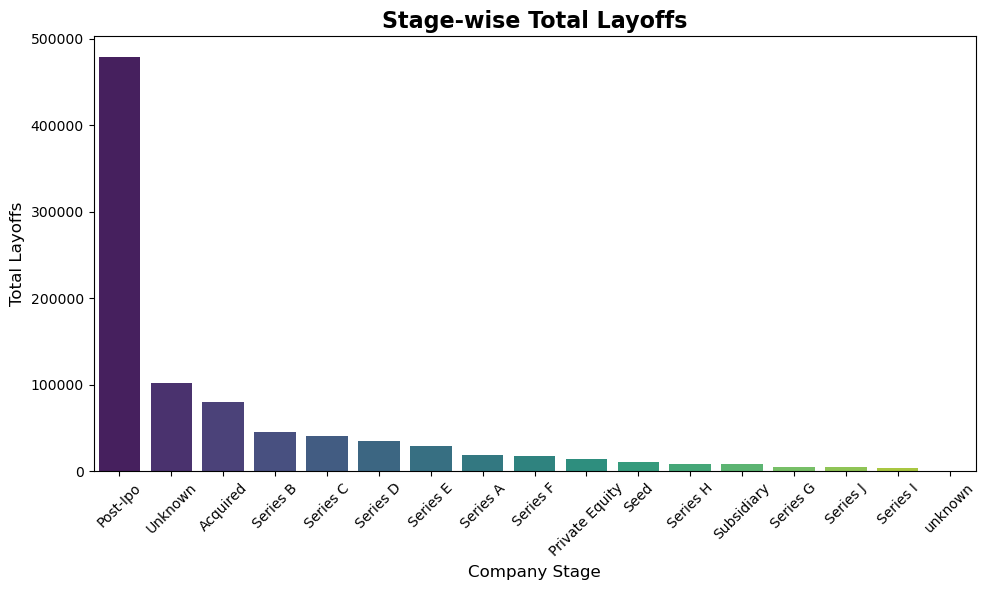

In [212]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=stage_total,
    x='stage',
    y='total_laid_off',
    palette='viridis'
)

plt.title("Stage-wise Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Company Stage", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [213]:
# Group by stage and calculate average % layoffs
stage_avg_pct = df.groupby('stage')['percentage_laid_off'].mean().reset_index()

# Sort descending
stage_avg_pct = stage_avg_pct.sort_values(by='percentage_laid_off', ascending=False)
stage_avg_pct

,stage,percentage_laid_off
3,Seed,67.838235
4,Series A,37.209434
15,Unknown,29.642045
5,Series B,29.605376
0,Acquired,24.652406
14,Subsidiary,23.275862
6,Series C,22.410465
16,unknown,21.400000
7,Series D,19.264535
8,Series E,17.821053


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\1928941536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


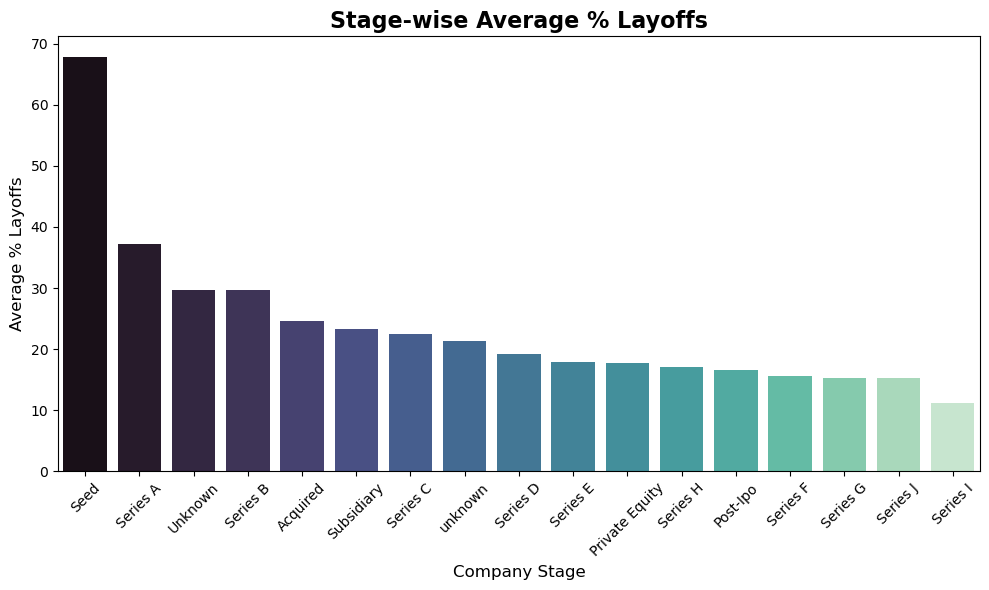

In [214]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=stage_avg_pct,
    x='stage',
    y='percentage_laid_off',
    palette='mako'
)

plt.title("Stage-wise Average % Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Company Stage", fontsize=12)
plt.ylabel("Average % Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [215]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name,Month_Year,Quarter_Year
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September,2025-09,2025Q3
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September,2025-09,2025Q3
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September,2025-09,2025Q3
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August,2025-08,2025Q3
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Series C,294.0,United States,2025,August,2025-08,2025Q3


In [216]:
# Group by location and sum total layoffs
location_layoffs = df.groupby('location')['total_laid_off'].sum().reset_index()

# Sort descending and take top 10
top10_locations = location_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)
top10_locations

,location,total_laid_off
210,Sf Bay Area,270741.0
207,Seattle,79093.0
166,New York City,52993.5
10,Austin,38660.5
19,Bengaluru,37595.5
194,Sacramento,27991.5
26,Boston,27385.5
132,London,26032.0
5,Amsterdam,19807.0
220,Stockholm,19120.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_19704\3263119382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


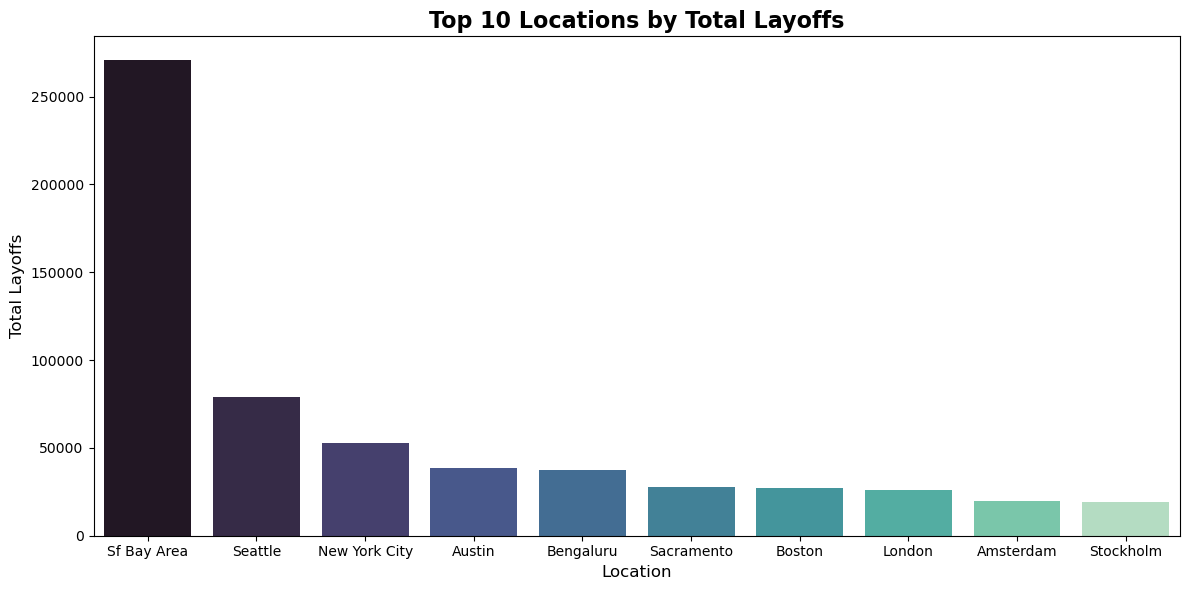

In [222]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top10_locations,
    y='total_laid_off',
    x='location',
    palette='mako'
)

plt.title("Top 10 Locations by Total Layoffs", fontsize=16, fontweight='bold')
plt.ylabel("Total Layoffs", fontsize=12)
plt.xlabel("Location", fontsize=12)
plt.tight_layout()
plt.show()

In [225]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name,Month_Year,Quarter_Year
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September,2025-09,2025Q3
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September,2025-09,2025Q3
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September,2025-09,2025Q3
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August,2025-08,2025Q3
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Series C,294.0,United States,2025,August,2025-08,2025Q3
